In [ ]:
%%capture
%pip install pybaseball

In [ ]:
# Imports
from pybaseball import batting_stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('chained_assignment', None)

In [ ]:
bat_df = batting_stats(2010, 2019)
bat_df.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
2,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,47,5,32,129,80,81,8,91,8,5,0,5,30,6,0.346,147,195,92,18,2582,1095,1487,14,0,0,0.132,0.148,0.89,0.438,0.640,1.078,0.294,0.368,0.0075,0.212,0.339,0.449,0.092,0.164,0.095,0.0,0.449,67.2,139,62.4,16.8,18.4,-5.3,101.1,10.4,$83.3,7.0,185,5.77,-8.16,13.93,62.93,6.11,0.92,3.62,4,6.44,-0.15,0.547,93.2,0.199,84.5,0.050,88.7,0.073,79.1,0.114,84.4,0.017,85.4,NaN,NaN,0.009,NaN,40.1,11.2,4.2,1.1,11.1,2.3,NaN,2.84,2.19,3.28,0.58,3.79,5.06,NaN,0.198,0.570,0.356,0.706,0.930,0.859,0.426,0.562,0.050,6.9,0.350,0.097,0.047,0.022,NaN,0.101,0.204,0.058,0.015,NaN,0.106,NaN,NaN,NaN,93.5,92.8,88.4,85.2,NaN,92.1,84.6,78.4,80.8,NaN,84.4,NaN,NaN,-2.4,-6.1,0.4,-4.1,NaN,-1.6,1.6,2.9,4.5,NaN,0.3,NaN,NaN,9.6,6.0,4.9,3.2,NaN,5.4,1.2,-5.3,-5.8,NaN,4.5,NaN,NaN,18.3,13.3,3.1,2.5,NaN,7.1,9.8,1.5,2.5,NaN,10.1,NaN,NaN,2.03,5.33,2.58,4.34,NaN,2.72,1.87,1.03,6.59,NaN,3.72,NaN,NaN,0.158,0.546,0.355,0.635,0.919,0.857,0.509,NaN,11.6,3.1,2.7,25 - 25,69.3,1.9,1.1,0.472,0.348,0.180,0.122,0.433,0.445,0.332,0.105,NaN,0.070,0.366,0.046,0.026,NaN,NaN,0.173,0.201,0.0,84.6,NaN,79.0,93.6,88.6,84.6,NaN,NaN,92.6,84.7,93.5,0.4,NaN,3.6,-1.9,0.5,-3.2,NaN,NaN,-4.2,2.1,-6.4,3.1,NaN,-7.2,8.2,4.2,1.6,NaN,NaN,4.4,-0.2,5.9,10.5,NaN,0.9,18.2,4.0,4.0,NaN,NaN,21.4,10.5,0.0,3.82,NaN,0.48,1.91,3.30,5.95,NaN,NaN,4.75,2.00,2.04,0.162,0.539,0.355,0.647,0.917,0.857,0.512,NaN,NaN,139,159,68,137,154,176,125,1.00,80,123,129,115,102,73,69,92,125,92.3,18.5,57,0.131,110.6,217,0.5,434,0.220,0.270,NaN,NaN,NaN
17,10155,2013,Mike Trout,LAA,21,157,589,716,190,115,39,9,27,109,97,110,10,136,9,8,0,8,33,7,0.323,

In [ ]:
bat_df.info(max_cols=319)

In [ ]:
bat_df.isnull().sum()

In [ ]:
bat_df.loc[bat_df['H'] < 300].shape

(1429, 319)

In [ ]:
batting = bat_df.loc[:, ['Season', 'Name', 'G', 'AB', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SO', 'AVG', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'HR/FB', 'wOBA', 'wRC+',
                         'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'SwStr%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%']]

In [ ]:
batting.shape

(1429, 42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

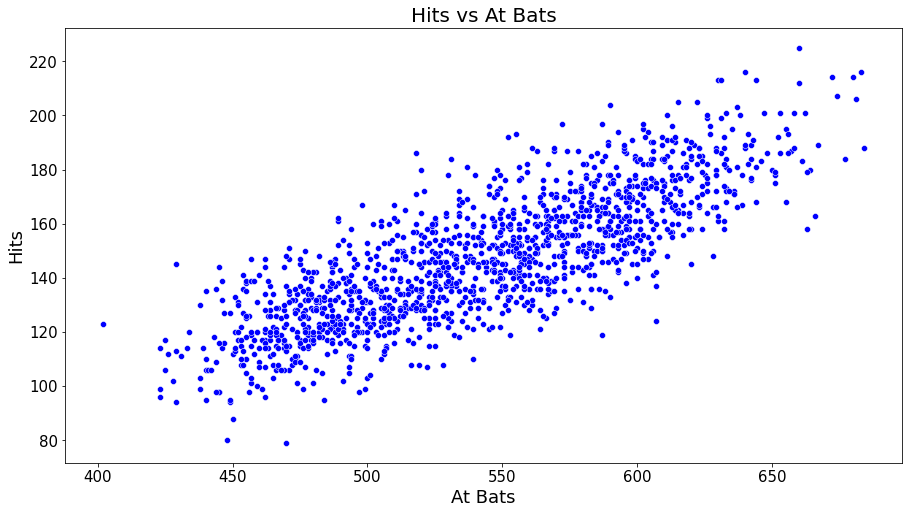

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(batting['AB'], batting['H'], color = 'blue')

plt.xlabel('At Bats', fontsize = 18)
plt.ylabel('Hits', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Hits vs At Bats', fontsize = 20)
;

''

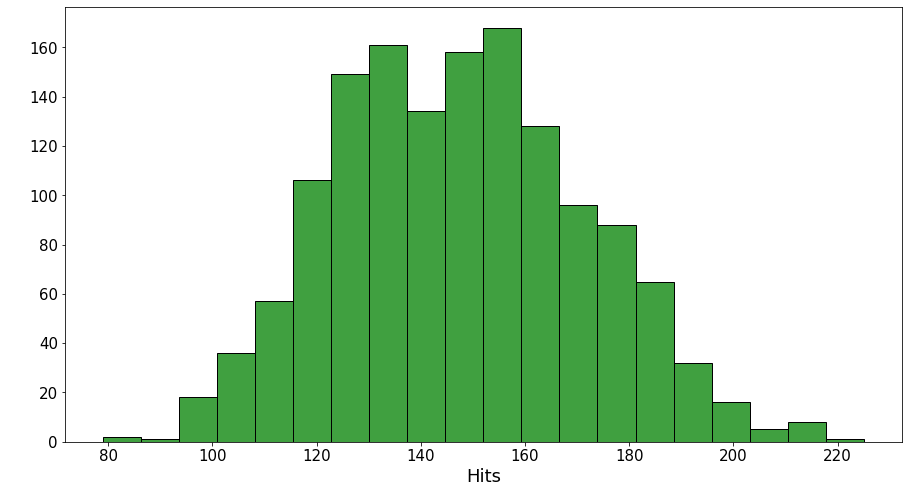

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(batting['H'], bins = 20, color = 'green')

plt.xlabel('Hits', fontsize = 18)
plt.ylabel(' ', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
;

In [ ]:
"""
df_1B = bat_df['1B'].sum()
df_2B = bat_df['2B'].sum()
df_3B = bat_df['3B'].sum()
df_HR = bat_df['HR'].sum()
hits_type = pd.concat([df_1B, df_2B, df_3B, df_HR], axis = 1)
hits_type
"""

# **Prediction Models**

In [ ]:
hits = batting.loc[:,['Season','Name','AB','H','AVG','BABIP','LD%','wOBA','Contact%','Swing%','Soft%','Med%','Hard%']]
hits['H_Next_Year'] = hits.sort_values(['Name', 'Season'], ascending=False).groupby('Name')['H'].shift()
hits = hits.loc[hits['AB'] > 300]
hits = hits.loc[hits['H_Next_Year'].notnull()]
trout = hits.loc[hits['Name'] == 'Mike Trout', ['Name', 'Season', 'H', 'AB', 'wOBA', 'H_Next_Year']].sort_values(by='Season').head(10)

In [ ]:
trout

,Name,Season,H,AB,wOBA,H_Next_Year
43,Mike Trout,2012,182,559,0.409,190.0
17,Mike Trout,2013,190,589,0.423,173.0
59,Mike Trout,2014,173,602,0.402,172.0
30,Mike Trout,2015,172,575,0.415,173.0
24,Mike Trout,2016,173,549,0.418,123.0
9,Mike Trout,2017,123,402,0.437,147.0
3,Mike Trout,2018,147,471,0.447,137.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

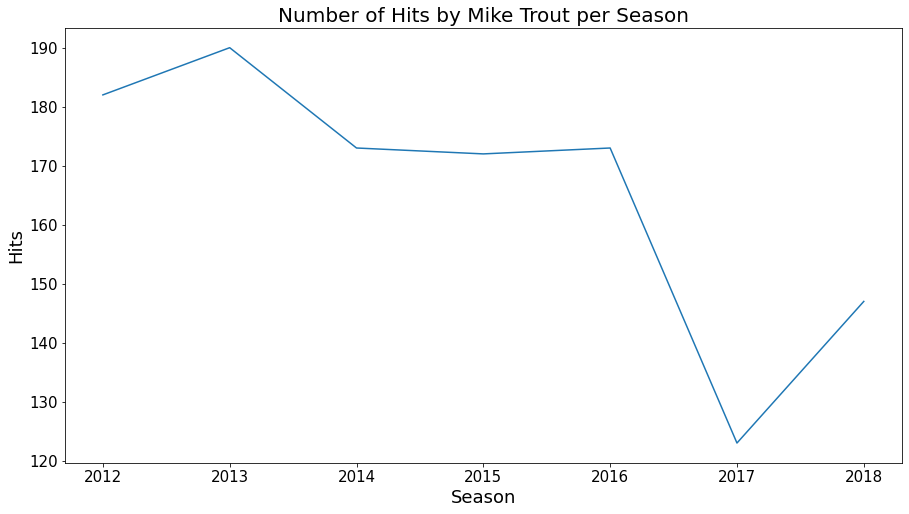

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(trout['Season'], trout['H'])

plt.xlabel('Season', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Hits', fontsize = 18)
plt.title('Number of Hits by Mike Trout per Season', fontsize = 20)
;

In [ ]:
hits.corr()[['H_Next_Year']].sort_values(by='H_Next_Year',ascending = False)

,H_Next_Year
H_Next_Year,1.000000
H,0.478192
AVG,0.427074
AB,0.324670
Contact%,0.278797
BABIP,0.268338
wOBA,0.158349
LD%,0.130166
Med%,0.122389
Swing%,0.090019


In [ ]:
X = hits[['H', 'AB', 'wOBA']].values
y = hits[['H_Next_Year']].values

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
print('Mean number of hits:', X_train[:,0].mean())
print('Mean absolute error:', mean_absolute_error(y_pred, y_train))

Mean number of hits: 152.1086956521739
Mean absolute error: 16.928578448324313


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean number of hits:', X_test[:,0].mean())
print('Mean absolute error:', mean_absolute_error(y_pred, y_test))

Mean number of hits: 151.89795918367346
Mean absolute error: 17.115532102567588


In [ ]:
print('Training score:', lr.score(X_train, y_train))
print('Testing score:', lr.score(X_test, y_test))

Training score: 0.2552667399576303
Testing score: 0.25096515126134955


# **2019 Season**

In [ ]:
hits_2019 = batting_stats(2018, 2019)
hits_2019.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
0,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,47,5,32,129,80,81,8,91,8,5,0,5,30,6,0.346,147,195,92,18,2582,1095,1487,14,0,0,0.132,0.148,0.89,0.438,0.640,1.078,0.294,0.368,0.0075,0.212,0.339,0.449,0.092,0.164,0.095,0.0,0.449,67.2,139,62.4,16.8,18.4,-5.3,101.1,10.4,$83.3,7.0,185,5.77,-8.16,13.93,62.93,6.11,0.92,3.62,4,6.44,-0.15,0.547,93.2,0.199,84.5,0.050,88.7,0.073,79.1,0.114,84.4,0.017,85.4,NaN,NaN,0.009,NaN,40.1,11.2,4.2,1.1,11.1,2.3,NaN,2.84,2.19,3.28,0.58,3.79,5.06,NaN,0.198,0.570,0.356,0.706,0.930,0.859,0.426,0.562,0.050,6.9,0.350,0.097,0.047,0.022,NaN,0.101,0.204,0.058,0.015,NaN,0.106,NaN,NaN,NaN,93.5,92.8,88.4,85.2,NaN,92.1,84.6,78.4,80.8,NaN,84.4,NaN,NaN,-2.4,-6.1,0.4,-4.1,NaN,-1.6,1.6,2.9,4.5,NaN,0.3,NaN,NaN,9.6,6.0,4.9,3.2,NaN,5.4,1.2,-5.3,-5.8,NaN,4.5,NaN,NaN,18.3,13.3,3.1,2.5,NaN,7.1,9.8,1.5,2.5,NaN,10.1,NaN,NaN,2.03,5.33,2.58,4.34,NaN,2.72,1.87,1.03,6.59,NaN,3.72,NaN,NaN,0.158,0.546,0.355,0.635,0.919,0.857,0.509,NaN,11.6,3.1,2.7,25 - 25,69.3,1.9,1.1,0.472,0.348,0.180,0.122,0.433,0.445,0.332,0.105,NaN,0.070,0.366,0.046,0.026,NaN,NaN,0.173,0.201,0.000,84.6,NaN,79.0,93.6,88.6,84.6,NaN,NaN,92.6,84.7,93.5,0.4,NaN,3.6,-1.9,0.5,-3.2,NaN,NaN,-4.2,2.1,-6.4,3.1,NaN,-7.2,8.2,4.2,1.6,NaN,NaN,4.4,-0.2,5.9,10.5,NaN,0.9,18.2,4.0,4.0,NaN,NaN,21.4,10.5,0.0,3.82,NaN,0.48,1.91,3.30,5.95,NaN,NaN,4.75,2.00,2.04,0.162,0.539,0.355,0.647,0.917,0.857,0.512,NaN,NaN,139,159,68,137,154,176,125,1.00,80,123,129,115,102,73,69,92,125,92.3,18.5,57,0.131,110.6,217,0.500,434,0.220,0.270,NaN,NaN,NaN
1,10155,2018,Mike Trout,LAA,26,140,471,608,147,80,24,4,39,101,79,122,25,124,10,4,0,5,24,2,0.3

In [ ]:
hits_2019 = hits_2019.loc[:,['Season','Name','AB','H','AVG','BABIP','LD%','wOBA','Contact%','Swing%','Soft%','Med%','Hard%']]

In [ ]:
hits_2019.shape

(275, 13)

In [ ]:
hits_2019['2019_actual_hits'] = hits_2019.sort_values(['Name', 'Season'], ascending=False).groupby('Name')['H'].shift()
hits_2019 = hits_2019.loc[hits_2019['AB'] > 300]
hits_2019 = hits_2019.loc[hits_2019['2019_actual_hits'].notnull()]

In [ ]:
X = hits_2019[['H', 'AB', 'wOBA']].values
y = hits_2019[['2019_actual_hits']].values

In [ ]:
y_pred = lr.predict(X)
print('Mean number of hits:', hits_2019['H'].mean())
print('Mean absolute error:', mean_absolute_error(y_pred, y))

Mean number of hits: 148.97560975609755
Mean absolute error: 17.368365316857933


In [ ]:
hits_2019['2020_Predicted_Hits'] = y_pred
hits_2019['Season'] = 2019
hits_2019 = hits_2019.rename(columns={'2019_actual_hits':'2019_Actual_Hits'})
hits_2019.loc[:,['Season','Name','2019_Actual_Hits','2020_Predicted_Hits']].sort_values(by = '2020_Predicted_Hits', ascending = False).head(20)

,Season,Name,2019_Actual_Hits,2020_Predicted_Hits
106,2019,Whit Merrifield,206.0,170.689757
176,2019,Jean Segura,161.0,168.092535
37,2019,Freddie Freeman,176.0,167.972119
4,2019,J.D. Martinez,175.0,165.632574
5,2019,Christian Yelich,161.0,164.801503
69,2019,Nick Castellanos,178.0,164.727484
80,2019,Michael Brantley,179.0,164.431820
40,2019,Manny Machado,150.0,163.806744
66,2019,Jose Altuve,149.0,162.906798
0,2019,Mookie Betts,176.0,162.675638


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

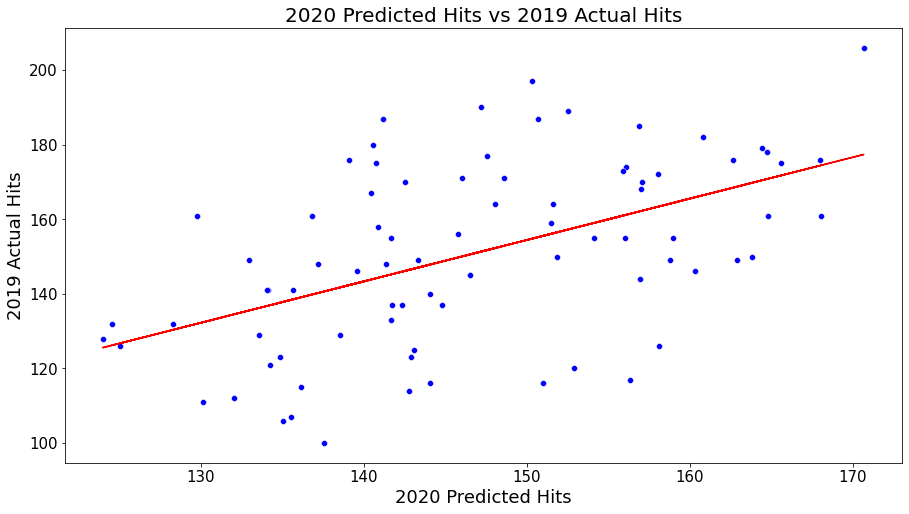

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(hits_2019['2020_Predicted_Hits'], hits_2019['2019_Actual_Hits'], color = 'blue')

m, b = np.polyfit(hits_2019['2020_Predicted_Hits'], hits_2019['2019_Actual_Hits'], 1)
plt.plot(hits_2019['2020_Predicted_Hits'], m*(hits_2019['2020_Predicted_Hits']) + b, color = 'red')

plt.xlabel('2020 Predicted Hits', fontsize = 18)
plt.ylabel('2019 Actual Hits', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('2020 Predicted Hits vs 2019 Actual Hits', fontsize = 20)
;